## 数据获取

In [31]:
# pip install pandas_datareader
import pandas_datareader as pdr
alibaba = pdr.get_data_yahoo('BABA')

In [32]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-11-03,102.800003,99.050003,99.669998,101.800003,40883700,101.800003
2014-11-04,106.359001,99.510002,100.425003,106.070000,67814000,106.070000
2014-11-05,110.139999,106.480003,108.480003,108.669998,48344000,108.669998
2014-11-06,111.699997,107.209999,109.300003,111.570000,33609000,111.570000
2014-11-07,114.769997,111.750000,112.930000,114.559998,51457000,114.559998


In [27]:
alibaba.shape

(1259, 6)

In [28]:
alibaba.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-28,179.639999,176.410004,176.500000,178.679993,11705400,178.679993
2019-10-29,177.740005,175.440002,177.059998,176.889999,8020500,176.889999
2019-10-30,177.880005,173.936005,175.419998,177.529999,10197600,177.529999
2019-10-31,179.240005,175.500000,179.160004,176.669998,15064800,176.669998
2019-11-01,182.119507,177.307999,179.009995,179.229996,15704602,179.229996


In [29]:
alibaba.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,130.536289,127.375786,129.084738,128.964464,1.708351e+07,128.964464
std,44.947058,43.926371,44.515304,44.444023,1.004818e+07,44.444023
min,58.650002,57.200001,57.299999,57.389999,3.775300e+06,57.389999
25%,85.555000,83.950001,85.050003,84.820000,1.087700e+07,84.820000
50%,119.070000,115.199997,117.250000,118.089996,1.471730e+07,118.089996
75%,175.815002,171.724998,174.340004,173.799995,2.012460e+07,173.799995
max,211.699997,207.509995,209.949997,210.860001,9.791410e+07,210.860001


In [24]:
alibaba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-11-03 to 2019-11-01
Data columns (total 6 columns):
High         1259 non-null float64
Low          1259 non-null float64
Open         1259 non-null float64
Close        1259 non-null float64
Volume       1259 non-null int64
Adj Close    1259 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


## 历史趋势分析

In [34]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [35]:
# 股票数据的读取
import pandas_datareader as pdr

In [36]:
# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# time
from datetime import datetime

In [40]:
start = datetime(2015,9,20)
alibaba = pdr.get_data_yahoo('BABA', start=start)
amazon = pdr.get_data_yahoo('AMZN', start=start)

In [41]:
# 将数据读取到本地
alibaba.to_csv('./data/baba.csv')
amazon.to_csv('./data/amzn.csv')

In [42]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002


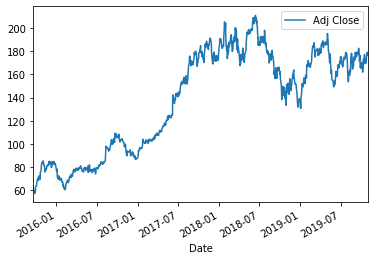

In [43]:
# 股价走势图
alibaba['Adj Close'].plot(legend=True)

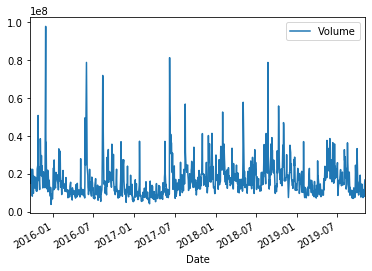

In [44]:
# 交易量走势图
alibaba['Volume'].plot(legend=True)

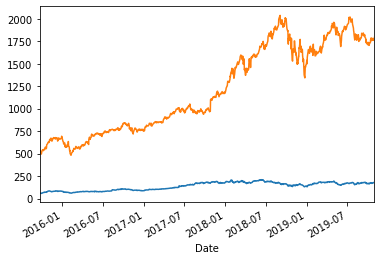

In [46]:
# 将阿里巴巴和亚马逊的股价走势图放在一张图里
alibaba['Adj Close'].plot()
amazon['Adj Close'].plot()

In [47]:
# 每天股价的最高值和最低值的差值
alibaba['high-low'] = alibaba['High'] - alibaba['Low']

In [48]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close,high-low
Date,,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002,3.440002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002,1.689999
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000,2.619999
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998,2.130001
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002,1.920002


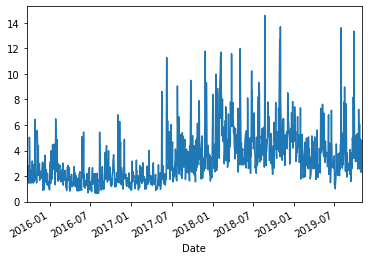

In [49]:
alibaba['high-low'].plot()

In [51]:
# 股票每天的变化情况  daily return
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()

In [52]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close,high-low,daily-return
Date,,,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002,3.440002,NaN
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002,1.689999,-0.031299
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000,2.619999,-0.030695
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998,2.130001,-0.001333
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002,1.920002,-0.011348


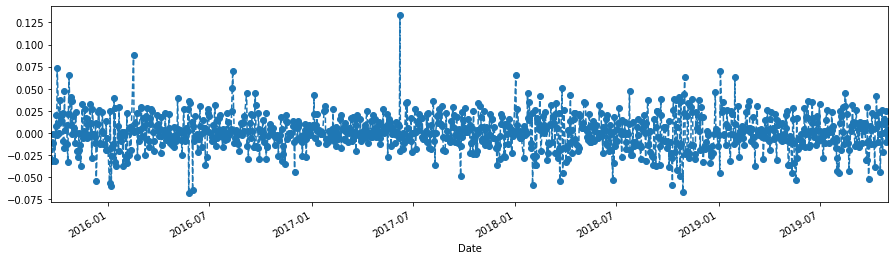

In [57]:
alibaba['daily-return'].plot(figsize=(15, 4), linestyle='--', marker='o')

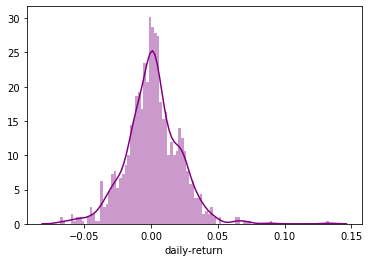

In [60]:
# 使用seabon画直方图
sns.distplot(alibaba['daily-return'].dropna(), bins=100, color='purple')